
___

# **Section 3.5. Hands-On Classification**

In this section, we will implement the  support vector machines classification model using the popular Skearn library.

## **Lab 4. Support Vector Machines**


**Step 1: Importing Libraries**

The first step is to import all relevant libraries and modules, and then load the dataset `breastcancer.csv`. In Module 2, we introduced `Matplotlib` as a useful library for data visualization. `Seaborn` is another Python data visualization library which is based on `Matplotlib`. It is also a useful library to be familiar with for more advanced visualization tasks. Refer to [Seaborn's documentation](https://seaborn.pydata.org/) for more details.

In [1]:
# Import relevant libraries

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (confusion_matrix, plot_confusion_matrix, classification_report)

print('Libraries have been imported.')

Libraries have been imported.


**Step 2: Importing the Dataset**

In [2]:
# Import the breastcancer.csv dataset 

cancer = pd.read_csv('breastcancer.csv')

**Step 3: Inspecting Data**

Recall that this is the same dataset that we used in the previous lab, thus we don't need to inspect it. View the first few entries of the cancer dataset quickly.

In [3]:
# Display first 5 rows

cancer.head()

id                     name  radius  texture  perimeter    area  \
0    ID842302           Glynnis Munson     NaN    10.38     122.80  1001.0   
1    ID842517              Lana Behrer   20.57    17.77     132.90  1326.0   
2  ID84300903  Devondra Vanvalkenburgh   19.69    21.25     130.00  1203.0   
3  ID84348301          Glory Maravalle     NaN    20.38      77.58   386.1   
4  ID84358402           Mellie Mccurdy   20.29    14.34     135.10  1297.0   

   smoothness  compactness  concavity  symmetry  fractal_dimension  age  \
0     0.11840      0.27760     0.3001    0.2419            0.07871   35   
1     0.08474      0.07864     0.0869    0.1812            0.05667   27   
2     0.10960      0.15990     0.1974    0.2069            0.05999   31   
3     0.14250      0.28390     0.2414    0.2597            0.09744   49   
4     0.10030      0.13280     0.1980    0.1809            0.05883   20   

   diagnosis  
0          1  
1          1  
2          1  
3          1  
4          1

**Step 4: Cleaning the Data**

As we did in Lab 3.3, we need to remove `id` and `name` features from the data as well as `NaN` values. 

In [4]:
# Drop id and name columns

cancer.drop(['id', 'name'], axis = 1, inplace = True)

In [5]:
# Drop rows having NaN values

cancer = cancer.dropna()

In [6]:
# Make sure NaN values were removed

cancer.isna().any()

radius               False
texture              False
perimeter            False
area                 False
smoothness           False
compactness          False
concavity            False
symmetry             False
fractal_dimension    False
age                  False
diagnosis            False
dtype: bool

In [7]:
# View head of data to confirm columns are dropped 

cancer.head()

radius  texture  perimeter    area  smoothness  compactness  concavity  \
1    20.57    17.77      132.9  1326.0     0.08474      0.07864    0.08690   
2    19.69    21.25      130.0  1203.0     0.10960      0.15990    0.19740   
4    20.29    14.34      135.1  1297.0     0.10030      0.13280    0.19800   
6    18.25    19.98      119.6  1040.0     0.09463      0.10900    0.11270   
10   16.02    23.24      102.7   797.8     0.08206      0.06669    0.03299   

    symmetry  fractal_dimension  age  diagnosis  
1     0.1812            0.05667   27          1  
2     0.2069            0.05999   31          1  
4     0.1809            0.05883   20          1  
6     0.1794            0.05742   38          1  
10    0.1528            0.05697   51          1

**Step 5: Defining the Variables**

Once again, set the **y** variable as 'diagnosis' and the rest of the features as the **X** variable. 

In [8]:
X = cancer.drop('diagnosis', axis = 1)
y = cancer['diagnosis']

**Step 6: Splitting the Data**

Split the dataset into test and training parts with a 30-70 split.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 109)

# note if you change the random_state value, you may get slightly different results

**Step 7: Running the Model**

Implement the SVM algorithm and fit it to the training data. Further, recall that SVM models need us to specify a kernel. Here, we simply use a linear kernel, however in other more challenging tasks, we may need to use other kernels which will help us with non-linear classification tasks. 

Recall that the kernel in SVM classifier transforms the data to the required form.

In [10]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
svm_model = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
svm_model.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = svm_model.predict(X_test)

**Step 8: Evaluating the Model's Performance**

i. Start by visually inspecting the model's predictions and plotting them.

In [11]:
# Inspect the predictions

y_pred, y_pred.shape

(array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1]),
 (150,))

In [12]:
# Inspect the actual data

y_test.shape, X_test.shape

((150,), (150, 10))

In [13]:
# Combine the actual dataset target with the predictions

cancer_test_data = pd.DataFrame({'Actual':y_test, 'Predictions':y_pred})

In [14]:
# Inspect the dataframe

cancer_test_data.sample(n=10)

Actual  Predictions
61        0            0
445       0            0
455       0            1
22        1            1
557       0            0
365       1            1
418       0            0
84        0            0
117       1            1
252       1            1

This dataset has 150 rows, but real-world dataset are much larger. Inspecting the output row by row is not efficient way. A better way is to inspect the accuracy of the predictions using a plot. So, let us plot this data.

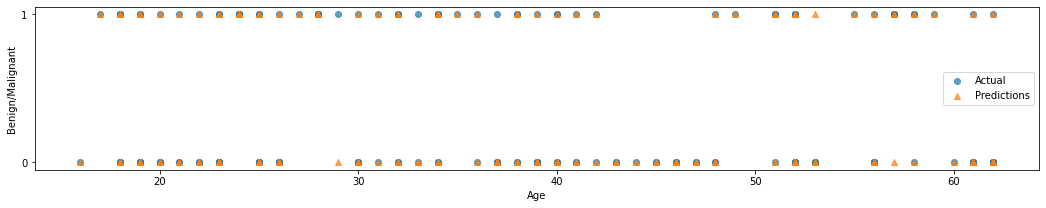

In [15]:
# Plot the predictions with the actual target

plt.figure(figsize=(18,3))
plt.scatter(X_test['age'],cancer_test_data['Actual'],label='Actual',alpha =0.7)
plt.scatter(X_test['age'],cancer_test_data['Predictions'],label='Predictions', marker='^',alpha =0.7)
plt.legend(loc=7)
plt.yticks([0,1])
plt.xlabel('Age')
plt.ylabel('Benign/Malignant')
plt.show()

Recall the plot obtained by the logistic regression model in the previous lab.

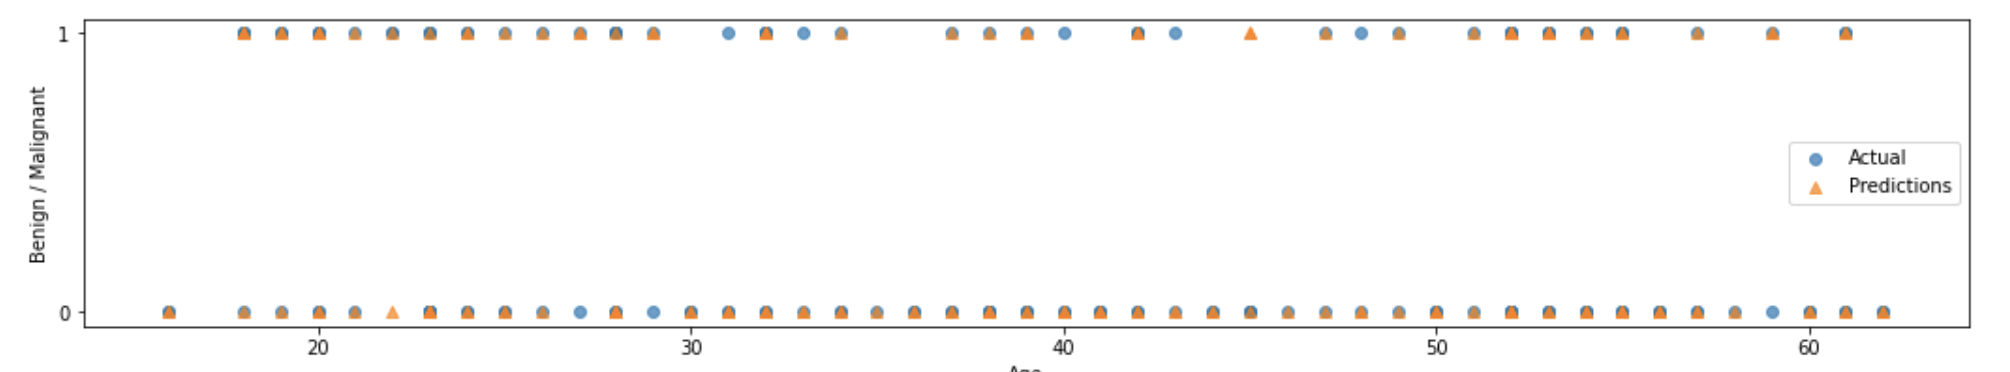

The plot shows that a high percentage of the predictions match with the actual data. If you compare it with the plot of the logistic regression lab, the model appears to be performing better.

Now, let us use the evaluation metrics to get a  precise idea about the model's performance.

ii. Print out the confusion matrix and the accuracy score, as before, and compare them with the outputs of the logistic regression model.

In [16]:
# Obtain the confusion matrix

conf = confusion_matrix(y_test, y_pred)
print(conf)

[[88  3]
 [ 5 54]]


We will now plot the confusion matrix. Visualizing the confusion matrix helps inspect the prediction especially with large datasets when the confusion matrix gets big.

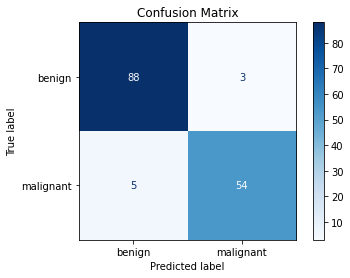

In [17]:
# Plot the confusion matrix

from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(svm_model, 
                             X_test, 
                             y_test,    
                             display_labels=["benign","malignant"],
                             cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")

plt.show()

In [18]:
accuracy = (conf[0,0]+conf[1,1])/(conf[0,0]+conf[0,1]+conf[1,0]+conf[1,1])
print(accuracy)
print("\nAccuracy:", int(accuracy*100), "%")

0.9466666666666667

Accuracy: 94 %


You can also get the accuracy score using the `score()` method, as shown below:

In [19]:
# Obtain the accuracy score

svm_model_s = svm_model.score(X_test, y_test)
print("Accuracy:", int(svm_model_s *100), "%")

Accuracy: 94 %


Let's obtain the classification report.

In [20]:
# Obtain the classification report

print(classification_report(y_test, y_pred, labels=[0,1], target_names=['benign','malignant']))

              precision    recall  f1-score   support

      benign       0.95      0.97      0.96        91
   malignant       0.95      0.92      0.93        59

    accuracy                           0.95       150
   macro avg       0.95      0.94      0.94       150
weighted avg       0.95      0.95      0.95       150



Let us recall the metrics obtained with the Logistic Regression model. 

In [ ]:
![Screen%20Shot%202021-01-04%20at%202.31.04%20PM.png](attachment:Screen%20Shot%202021-01-04%20at%202.31.04%20PM.png)

As expected, the SVM model performs substantially better than the logistic regression model. In other more challenging problems, this performance difference may be more pronounced. Recall the flexibility vs. interpretability trade-off discussed in Module 1 - Simplicity might in some cases be the better option. 

## **Classification Exercise**

Use the `heart_failure_clinical_records_dataset.csv` dataset to build and train an SVM model to predict mortality by heart failure.

**Acknowledgments for dataset**

Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). (https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5)

In [59]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (confusion_matrix, plot_confusion_matrix, classification_report)

print('Libraries have been imported.')

Libraries have been imported.


In [60]:
# Import the dataset
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [61]:
# Inspect the dataset
data.head(10)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   
5  90.0        1                        47         0                 40   
6  75.0        1                       246         0                 15   
7  60.0        1                       315         1                 60   
8  65.0        0                       157         0                 65   
9  80.0        1                       123         0                 35   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   
5                    1  204000.00               2.1           132    1   
6                    0  127000.00               1.2           137    1   
7                    0  454000.00               1.1           131    1   
8                    0  263358.03               1.5           138    0   
9                    1  388000.00               9.4           133    1   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1  
5        1     8            1  
6        0    10            1  
7        1    10            1  
8        0    10            1  
9        1    10            1

In [62]:
# Generate Summary statistics
data.describe().T

count           mean           std      min  \
age                       299.0      60.833893     11.894809     40.0   
anaemia                   299.0       0.431438      0.496107      0.0   
creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
diabetes                  299.0       0.418060      0.494067      0.0   
ejection_fraction         299.0      38.083612     11.834841     14.0   
high_blood_pressure       299.0       0.351171      0.478136      0.0   
platelets                 299.0  263358.029264  97804.236869  25100.0   
serum_creatinine          299.0       1.393880      1.034510      0.5   
serum_sodium              299.0     136.625418      4.412477    113.0   
sex                       299.0       0.648829      0.478136      0.0   
smoking                   299.0       0.321070      0.467670      0.0   
time                      299.0     130.260870     77.614208      4.0   
DEATH_EVENT               299.0       0.321070      0.467670      0.0   

                               25%       50%       75%       max  
age                           51.0      60.0      70.0      95.0  
anaemia                        0.0       0.0       1.0       1.0  
creatinine_phosphokinase     116.5     250.0     582.0    7861.0  
diabetes                       0.0       0.0       1.0       1.0  
ejection_fraction             30.0      38.0      45.0      80.0  
high_blood_pressure            0.0       0.0       1.0       1.0  
platelets                 212500.0  262000.0  303500.0  850000.0  
serum_creatinine               0.9       1.1       1.4       9.4  
serum_sodium                 134.0     137.0     140.0     148.0  
sex                            0.0       1.0       1.0       1.0  
smoking                        0.0       0.0       1.0       1.0  
time                          73.0     115.0     203.0     285.0  
DEATH_EVENT                    0.0       0.0       1.0       1.0

In [63]:
# Inspect the various columns (features) in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [64]:
# Convert age to integer type 
data['age'] = data['age'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


In [65]:
# Define the variables
X = data.drop('DEATH_EVENT', axis = 1)
y = data['DEATH_EVENT']

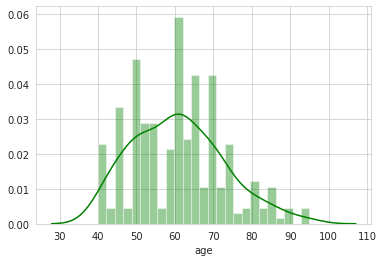

In [66]:
# Plot a histogram of the distribution of Age feature in the dataset
# Hint use Seaborn's distplot 
sns.set_style(style='whitegrid')
sns.distplot(data['age'], color = 'green', bins = 25)

In [67]:
# Split the data with a 70-30 split
# Use random_state = 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [68]:
# Inspect the actual data
print(X_test.shape, y_test.shape)

(90, 12) (90,)


In [75]:
# Run the model and obtain the predictions
# Import svm model
from sklearn import svm

# Create a svm Classifier
svm_model = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
svm_model.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = svm_model.predict(X_test)

In [76]:
# Combine the actual dataset target with the predictions
test_data = pd.DataFrame({'Actual':y_test, 'Predictions':y_pred})
test_data.sample(n=10)

Actual  Predictions
33        0            1
77        0            0
42        1            1
209       0            0
164       1            0
155       0            0
30        1            1
22        1            1
59        1            1
154       0            0

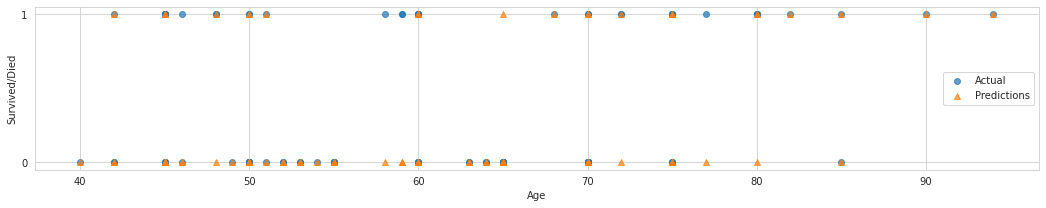

In [77]:
# Plot the predictions with the actual target

plt.figure(figsize=(18,3))
plt.scatter(X_test['age'],test_data['Actual'],label='Actual', alpha=0.7)
plt.scatter(X_test['age'],test_data['Predictions'],label='Predictions', marker='^',alpha=0.7)
plt.legend(loc=7)
plt.yticks([0,1])
plt.xlabel('Age')
plt.ylabel('Survived/Died')
plt.show()

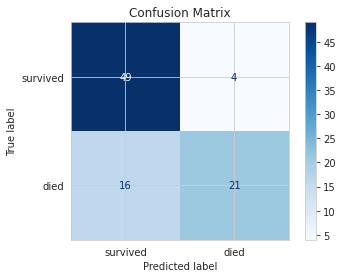

In [78]:
# Plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(svm_model, 
                             X_test, 
                             y_test,    
                             display_labels=["survived","died"],
                             cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
plt.show()

In [79]:
# Obtain the classification report
print(classification_report(y_test, y_pred, labels=[0,1], target_names=['survived','died']))

              precision    recall  f1-score   support

    survived       0.75      0.92      0.83        53
        died       0.84      0.57      0.68        37

    accuracy                           0.78        90
   macro avg       0.80      0.75      0.75        90
weighted avg       0.79      0.78      0.77        90



In [80]:
# Obtain the accuracy score
svm_model_s = svm_model.score(X_test, y_test)
print("Accuracy:", int(svm_model_s *100), "%")

Accuracy: 77 %


## LMS Upload



Once you complete the above exercise, save the code snippet to a text file and upload it to the LMS under the Uploads tab in the field name: ML Classification Exercise.

Remember to shutdown this notebook once done from this lab.

## **Switch to LMS**

Switch to the LMS to review lab results, complete review questions, and then start with the next lab.